In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
data_path = r'../data/train.csv'
data = pd.read_csv(data_path)

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [4]:
data = data.sort_values(by=['date']).reset_index(drop=True)

In [5]:
train_data = data[data['year']<2017]

test_data = data[data['year']==2017]

In [6]:
y_train = train_data['sales']
y_test = test_data['sales']

In [21]:
agg_train_sales = train_data.groupby('date')['sales'].sum()
agg_train_sales

date
2013-01-01    13696
2013-01-02    13678
2013-01-03    14488
2013-01-04    15677
2013-01-05    16237
              ...  
2016-12-27    19341
2016-12-28    19560
2016-12-29    21111
2016-12-30    22296
2016-12-31    23792
Name: sales, Length: 1461, dtype: int64

<AxesSubplot:xlabel='date'>

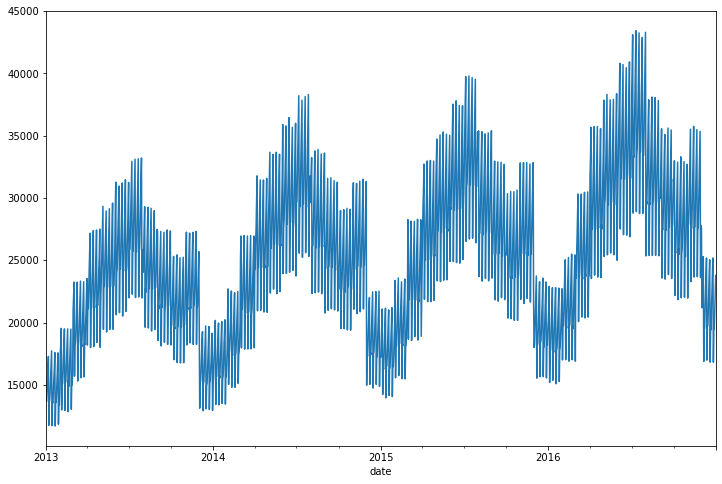

In [24]:
plt.figure(figsize=(12,8))
agg_train_sales.plot(kind='line')

In [38]:
train_data[(train_data['store'] == 1) & (train_data['item'] == 1)]

,date,store,item,sales,year,month,day,sales_diff
0,2013-01-01,1,1,13,2013,1,1,NaN
699,2013-01-02,1,1,11,2013,1,2,-2.0
1062,2013-01-03,1,1,14,2013,1,3,3.0
1861,2013-01-04,1,1,13,2013,1,4,-1.0
2291,2013-01-05,1,1,10,2013,1,5,-3.0
...,...,...,...,...,...,...,...,...
728118,2016-12-27,1,1,10,2016,12,27,-6.0
728835,2016-12-28,1,1,16,2016,12,28,6.0
729113,2016-12-29,1,1,21,2016,12,29,5.0
729877,2016-12-30,1,1,24,2016,12,30,3.0


In [30]:
train_data['sales_diff'] = train_data.groupby(["store", "item"])['sales'].transform(lambda x: x.diff())
train_data

C:\Users\Sagar\AppData\Local\Temp/ipykernel_16308/2710663610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sales_diff'] = train_data.groupby(["store", "item"])['sales'].transform(lambda x: x.diff())


,date,store,item,sales,year,month,day,sales_diff
0,2013-01-01,1,1,13,2013,1,1,NaN
1,2013-01-01,7,12,26,2013,1,1,NaN
2,2013-01-01,7,46,27,2013,1,1,NaN
3,2013-01-01,8,12,54,2013,1,1,NaN
4,2013-01-01,9,12,35,2013,1,1,NaN
...,...,...,...,...,...,...,...,...
730495,2016-12-31,6,18,60,2016,12,31,12.0
730496,2016-12-31,1,42,31,2016,12,31,4.0
730497,2016-12-31,4,6,41,2016,12,31,-5.0
730498,2016-12-31,9,4,17,2016,12,31,-6.0


In [33]:
agg_train_sales_diff = train_data.groupby('date')['sales_diff'].sum()
agg_train_sales_diff

date
2013-01-01       0.0
2013-01-02     -18.0
2013-01-03     810.0
2013-01-04    1189.0
2013-01-05     560.0
               ...  
2016-12-27    2510.0
2016-12-28     219.0
2016-12-29    1551.0
2016-12-30    1185.0
2016-12-31    1496.0
Name: sales_diff, Length: 1461, dtype: float64

<AxesSubplot:xlabel='date'>

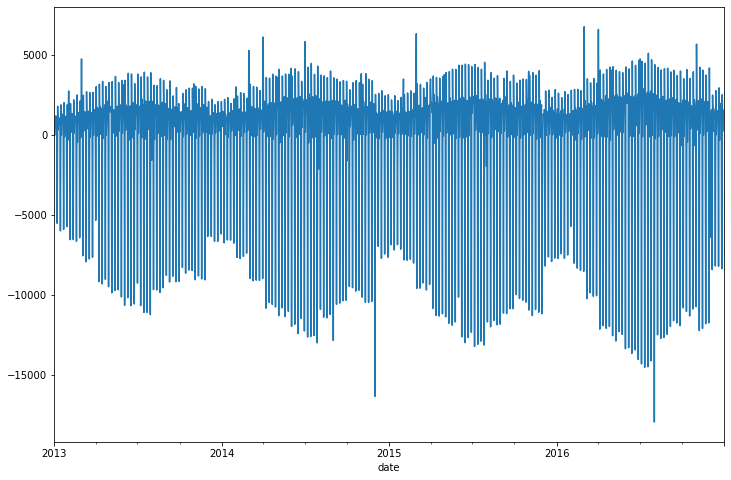

In [35]:
plt.figure(figsize=(12,8))
agg_train_sales_diff.plot(kind='line')

In [47]:
X_train = train_data.dropna()
y_train_diff = X_train['sales_diff']
X_train = X_train.drop(columns=['date','sales','sales_diff'])
X_train

,store,item,year,month,day
500,4,16,2013,1,2
501,8,8,2013,1,2
502,9,25,2013,1,2
503,10,10,2013,1,2
504,8,3,2013,1,2
...,...,...,...,...,...
730495,6,18,2016,12,31
730496,1,42,2016,12,31
730497,4,6,2016,12,31
730498,9,4,2016,12,31


In [48]:
y_train_diff

500        2.0
501       11.0
502        3.0
503        5.0
504        0.0
          ... 
730495    12.0
730496     4.0
730497    -5.0
730498    -6.0
730499    -4.0
Name: sales_diff, Length: 730000, dtype: float64

In [49]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train_diff)

DecisionTreeRegressor()

In [54]:
test_data

,date,store,item,sales,year,month,day
730500,2017-01-01,4,27,18,2017,1,1
730501,2017-01-01,1,39,36,2017,1,1
730502,2017-01-01,1,46,38,2017,1,1
730503,2017-01-01,7,29,43,2017,1,1
730504,2017-01-01,9,35,66,2017,1,1
...,...,...,...,...,...,...,...
912995,2017-12-31,9,34,21,2017,12,31
912996,2017-12-31,10,34,32,2017,12,31
912997,2017-12-31,1,35,55,2017,12,31
912998,2017-12-31,8,33,100,2017,12,31


In [55]:
train_data[(train_data['store'] == 4) & (train_data['item'] == 27)]

,date,store,item,sales,year,month,day,sales_diff
453,2013-01-01,4,27,17,2013,1,1,NaN
825,2013-01-02,4,27,13,2013,1,2,-4.0
1102,2013-01-03,4,27,11,2013,1,3,-2.0
1541,2013-01-04,4,27,13,2013,1,4,2.0
2487,2013-01-05,4,27,16,2013,1,5,3.0
...,...,...,...,...,...,...,...,...
728083,2016-12-27,4,27,16,2016,12,27,-4.0
728825,2016-12-28,4,27,12,2016,12,28,-4.0
729063,2016-12-29,4,27,18,2016,12,29,6.0
729595,2016-12-30,4,27,17,2016,12,30,-1.0


In [56]:
dt.feature_importances_

array([0.21041208, 0.3548333 , 0.16249815, 0.23133556, 0.04092091])

In [58]:
dt.feature_names_in_

array(['store', 'item', 'year', 'month', 'day'], dtype=object)

In [59]:
test_data['dt_pred_diff'] = dt.predict(test_data.drop(columns=['date','sales']))
test_data

C:\Users\Sagar\AppData\Local\Temp/ipykernel_16308/949555752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['dt_pred_diff'] = dt.predict(test_data.drop(columns=['date','sales']))


,date,store,item,sales,year,month,day,dt_pred_diff
730500,2017-01-01,4,27,18,2017,1,1,16.0
730501,2017-01-01,1,39,36,2017,1,1,3.0
730502,2017-01-01,1,46,38,2017,1,1,-20.0
730503,2017-01-01,7,29,43,2017,1,1,-24.0
730504,2017-01-01,9,35,66,2017,1,1,1.0
...,...,...,...,...,...,...,...,...
912995,2017-12-31,9,34,21,2017,12,31,6.0
912996,2017-12-31,10,34,32,2017,12,31,5.0
912997,2017-12-31,1,35,55,2017,12,31,-4.0
912998,2017-12-31,8,33,100,2017,12,31,4.0


In [60]:
concat_df = pd.concat([train_data,test_data])
concat_df

,date,store,item,sales,year,month,day,sales_diff,dt_pred_diff
0,2013-01-01,1,1,13,2013,1,1,NaN,NaN
1,2013-01-01,7,12,26,2013,1,1,NaN,NaN
2,2013-01-01,7,46,27,2013,1,1,NaN,NaN
3,2013-01-01,8,12,54,2013,1,1,NaN,NaN
4,2013-01-01,9,12,35,2013,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
912995,2017-12-31,9,34,21,2017,12,31,NaN,6.0
912996,2017-12-31,10,34,32,2017,12,31,NaN,5.0
912997,2017-12-31,1,35,55,2017,12,31,NaN,-4.0
912998,2017-12-31,8,33,100,2017,12,31,NaN,4.0


In [64]:
from tqdm import tqdm

In [113]:
def predict_dt(df):
    
    df = df.copy()
    
    for index in tqdm(test_data.index):
        
        row = df.loc[index]
        
        date = row['date'] - pd.Timedelta(1,unit='D')
        store = row['store']
        item = row['item']
        diff_pred = row['dt_pred_diff']

#         print(date)
#         print(row['date'])
#         print(item)
#         display(concat_df[concat_df['item'] == item])
        
        
        prev_sales = concat_df[(concat_df['date'] == date) & 
                               (concat_df['store'] == store) & 
                               (concat_df['item'] == item)]['sales'].iloc[0]

#         display(prev_sales)
        df.loc[index,'dt_pred'] = prev_sales + diff_pred
        
    return df

In [ ]:
dt_pred = predict_dt(concat_df)

 13%|█████████▋                                                                 | 23570/182500 [14:12<59:24, 44.59it/s]